In [67]:
# Visualization code

# Call relevant libraries
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

In [71]:
# Recall the data from the project proposal and only select for year and portfolios
pf_data <- read.csv("all_data.csv") |>
        select(-annual_inflation, 
               -real_gdp_growth_rate_percentage, 
               -annual_unemployment_rate, 
               -max_portfolio_return_value, 
               -max_portfolio_return_name) 

# Renamed all of the portfolio names to clean the titles
names(pf_data)[names(pf_data) == 'income_portfolio_return_percentage'] <- 'Income_portfolio'
names(pf_data)[names(pf_data) == 'X60.40_portfolio_return_percentage'] <- '60/40_portfolio'
names(pf_data)[names(pf_data) == 'X40.60_portfolio_return_percentage'] <- '40/60_portfolio'
names(pf_data)[names(pf_data) == 'growth_portfolio_return_percentage'] <- 'Growth_portfolio'
names(pf_data)[names(pf_data) == 'moderate_portfolio_return_percentage'] <- 'Moderate_portfolio'
names(pf_data)[names(pf_data) == 'conservative_portfolio_return_percentage'] <- 'Conservative_portfolio'

# Pivot longer to tidy the data to our need: Visualization
pf_data <- pf_data|>
        pivot_longer(cols = Income_portfolio:Conservative_portfolio, 
                 names_to = "Portfolio_type", 
                 values_to = "portfolio_return_percentage")

# Check the product
pf_data


year,Portfolio_type,portfolio_return_percentage
<int>,<chr>,<dbl>
1997,Income_portfolio,10.39
1997,60/40_portfolio,22.37
1997,40/60_portfolio,18.06
⋮,⋮,⋮
2021,Growth_portfolio,15.24
2021,Moderate_portfolio,10.83
2021,Conservative_portfolio,6.42


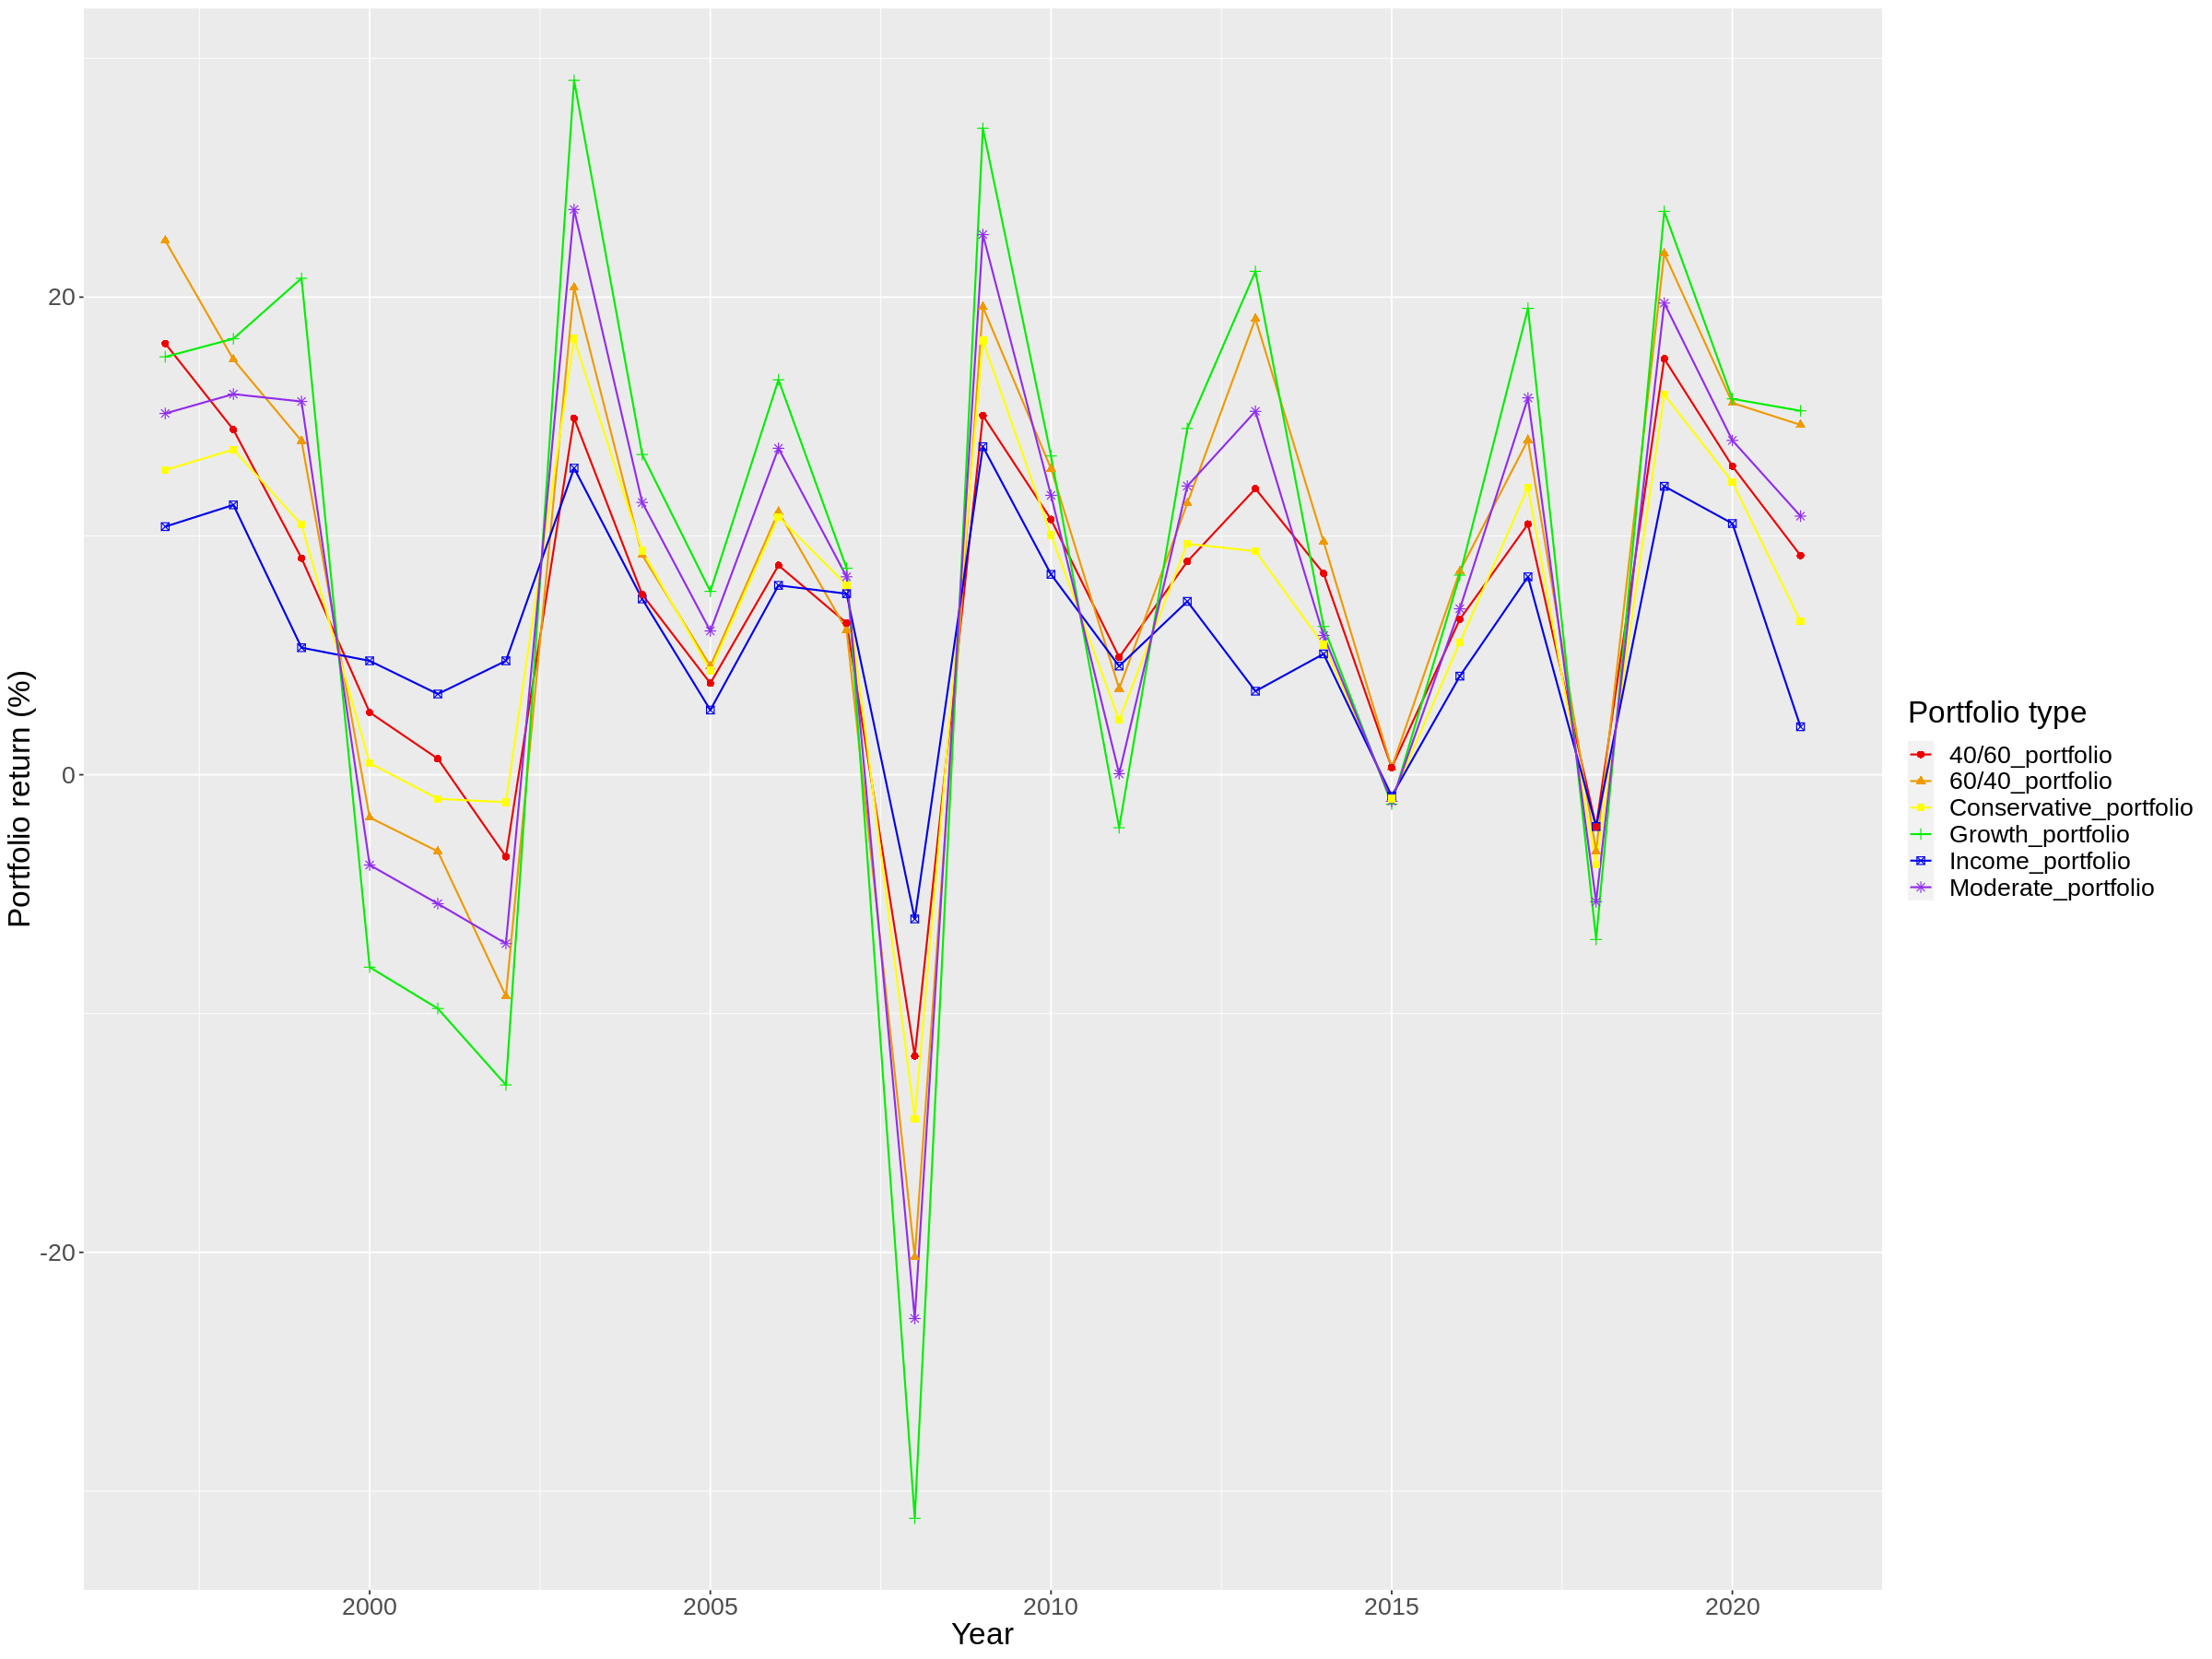

In [72]:
# Set graph size
options(repr.plot.width = 20, repr.plot.height = 15) 

# Create the graph with all of the portfolio return percentages
pf_plot <- pf_data |>
        ggplot(aes(x = year, y = portfolio_return_percentage)) + 
        geom_line(aes(color = Portfolio_type), lwd = 0.6) + 
        scale_color_manual(values = c("red2", "orange2", "yellow", "green2", "blue2", "purple2")) +
        geom_point(aes(colour = Portfolio_type, shape = Portfolio_type), size = 2) +
        labs(x = "Year", y = "Portfolio return (%)", colour = "Portfolio type", shape = "Portfolio type") +
        theme(text = element_text(size=20))

# Check the product
pf_plot

# Save the graph as PNG file
ggsave(filename = "Portfolio.png", pf_plot,
       width = 20, height = 15, dpi = 150, units = "in", device='png')